In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load data
rf = pd.read_csv("/Users/arsenpankiv/Desktop/Python_practice/small_dataset.csv")

# Clean data
rf["date"] = pd.to_datetime(rf["date"])
rf["skills_list"] = rf["skills_list"].apply(
    lambda skills: ast.literal_eval(skills) if isinstance(skills, str) else skills)

In [15]:
# a copy of the dataset

# based on skill_pay_analysis.ipynb

stat = rf[rf["job_title"] == "Statistician"].copy()
stat.dropna(subset="mean_salary", inplace=True)
stat = stat.explode("skills_list")

grouped = stat.groupby("skills_list")["mean_salary"].agg(["count","median"])

top_pay = grouped.sort_values(by="median", ascending=False).head(10)
top_count = grouped.sort_values(by="count",ascending=False).head(10)

top_pay

,count,median
skills_list,,
Probability,4,21386.0
Regression,4,21386.0
SAS,4,21386.0
Data Analysis,3,21314.0
Python,3,21314.0
R,3,21314.0
Data Cleaning,1,20911.0
Machine Learning,1,20911.0
Statistics,1,20911.0


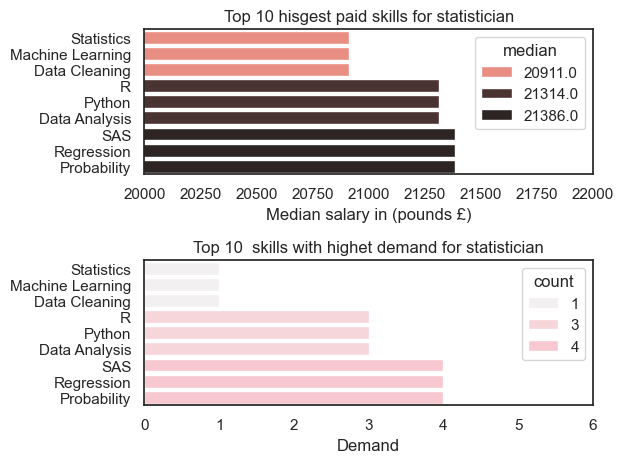

In [19]:
import seaborn as sns 

fig, ax = plt.subplots(2, 1)
sns.set_theme(style="ticks")

#top_pay.plot(kind="barh", y="median", ax=ax[0])
"""we need to generate basically the same line but using seaborn instead of pandas"""

sns.barplot(data=top_pay, x="median", y=top_pay.index, ax=ax[0], hue="median", palette="dark:salmon_r")
# hue - means the column we want to colour 
# palette - here we define a colour we want
"""let's now set the more appealing background """

ax[0].invert_yaxis()
ax[0].set_xlim(20000,22000)
ax[0].set_title("Top 10 hisgest paid skills for statistician")
ax[0].set_ylabel("")
ax[0].set_xlabel("Median salary in (pounds £)")


#top_count.plot(kind="barh", y="count",ax=ax[1])

sns.barplot(data=top_count,x="count", y=top_count.index, ax=ax[1], hue="count",palette="light:pink")
ax[1].set_title("Top 10  skills with highet demand for statistician")
ax[1].set_xlabel("Demand")
ax[1].set_ylabel("")
ax[1].invert_yaxis()
ax[1].set_xlim(0,6)

fig.tight_layout() #to overcome overlapping 
